# Taller de Regresión Lineal Orientado al Negocio

Este taller se centra en **cómo** un negocio (por ejemplo, un e-commerce) puede **interpretar** y **aprovechar** los resultados de la Regresión Lineal para **tomar decisiones**.

## Contexto de Negocio
Imagina que eres el/la **gerente de marketing** de una tienda en línea. Tienes un conjunto de datos con el comportamiento de los clientes y la **cantidad anual** que han gastado (`Yearly Amount Spent`). Tu objetivo es:
1. **Identificar** qué factores (tiempo en la app, duración de la sesión, etc.) influyen más en el gasto anual.
2. **Predecir** el gasto anual futuro de los clientes.
3. Traducir estos hallazgos en **acciones concretas** que aumenten el gasto de los clientes.

## Datos Disponibles
Se te proporciona un dataset con las columnas:
- **Email**
- **Address**
- **Avatar**
- **Avg. Session Length** (Promedio de duración de la sesión)
- **Time on App** (Tiempo en la App)
- **Time on Website** (Tiempo en el Sitio Web)
- **Length of Membership** (Antigüedad de membresía, en años)
- **Yearly Amount Spent** (Cantidad gastada anualmente)

Tu variable objetivo para predecir es: **Yearly Amount Spent**.

## 1. Carga y Exploración de Datos

### Tarea 1.1: Cargar los datos
1. Crea un DataFrame (por ejemplo, `df`) leyendo el archivo CSV o introduciendo manualmente la tabla que se te proporcionó.
2. Muestra las primeras 5 filas (`df.head()`), la forma (`df.shape`) y los tipos de datos (`df.info()`).

**Pregunta de enfoque de negocio:**
- ¿Qué **insights** iniciales obtienes con solo ver las variables? ¿Cómo podría eso impactar tus **estrategias de marketing**?

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv

--2025-03-12 19:49:35--  https://github.com/javierherrera1996/lecture_analytics/raw/main/Ecommerce%20_Customers.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv [following]
--2025-03-12 19:49:35--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/Ecommerce%20_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87360 (85K) [text/plain]
Saving to: ‘Ecommerce _Customers.csv’

Ecommerce _Customer 100%[===================>]  85.31K  --.-KB/s    in 0.02s   

2025-03-12 19:49:36 (3.62 MB/s) - ‘Eco

In [2]:
# EJEMPLO de código:
import pandas as pd

# Supongamos que has guardado tu dataset en un archivo 'data.csv'
df = pd.read_csv('Ecommerce _Customers.csv')
df.head()



,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Tarea 1.2: Análisis Exploratorio (EDA) Básico
1. Ejecuta `df.describe()` para revisar las estadísticas descriptivas de las variables numéricas.
2. Realiza uno o dos **boxplots** o **histogramas** para visualizar la distribución de:
   - **Avg. Session Length**
   - **Time on App**
   - **Time on Website**
   - **Length of Membership**
   - **Yearly Amount Spent**

**Preguntas de negocio:**
1. Si detectas que, por ejemplo, la gente con **mayor** `Length of Membership` gasta más, ¿qué **estrategias** implementarías para retener y "graduar" a los nuevos clientes a miembros más "antiguos"?
2. Si notas que el **Time on Website** es muy bajo vs. **Time on App**, ¿implica que debas mejorar la experiencia en el sitio web para que la gente pase más tiempo allí?

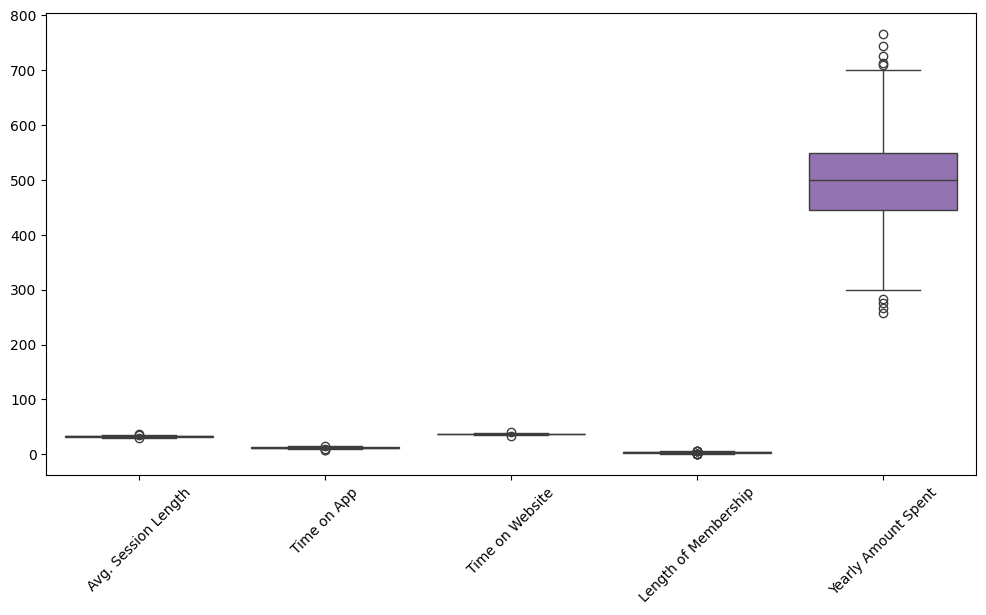

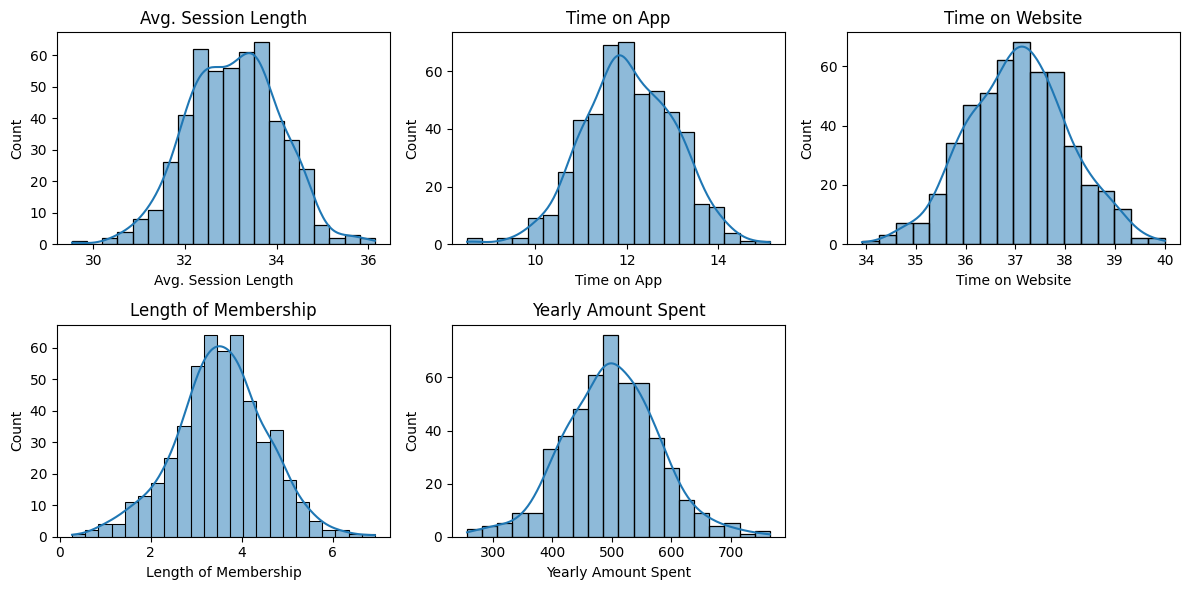

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.describe()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']])
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
for col in ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']:
    plt.subplot(2, 3, ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent'].index(col) + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


## 2. Selección de Variables
En este dataset, algunas columnas como **Email**, **Address** o **Avatar** no son útiles directamente para el modelo de regresión.

### Tarea 2.1: Elegir features
- Usarás como variables predictoras (features) las siguientes columnas:
  1. **Avg. Session Length**
  2. **Time on App**
  3. **Time on Website**
  4. **Length of Membership**
- La columna objetivo (target) será **Yearly Amount Spent**.

**Pregunta de negocio**:
- ¿Por qué estas columnas tienen sentido para **explicar** el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").

In [4]:

X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']


In [ ]:


# ¿Por qué estas columnas tienen sentido para explicar el gasto anual? (Piensa en la lógica, "mientras más tiempo en app, más oportunidades de compra").
# Respuesta:
# Las columnas 'Avg. Session Length', 'Time on App', 'Time on Website', y 'Length of Membership' son buenas variables predictoras para el gasto anual porque existe una correlación lógica entre el tiempo que un cliente interactúa con la plataforma y su predisposición a realizar compras.
#
# - Avg. Session Length: Una sesión más larga puede indicar un mayor interés en los productos, lo que lleva a una mayor probabilidad de compra y, por lo tanto, a un gasto mayor.
# - Time on App: Similar a la duración de la sesión, un tiempo prolongado en la aplicación móvil sugiere una exploración más exhaustiva de los productos y ofertas, lo que aumenta la probabilidad de conversiones y gasto.  Dado que la aplicación móvil suele ofrecer una experiencia más interactiva y personalizada que un sitio web, una mayor interacción en la app podría estar ligada a un gasto más alto.
# - Time on Website: El tiempo pasado en el sitio web también puede ser un indicador de interés en los productos.  Clientes que pasan más tiempo explorando el sitio tienen más oportunidades de descubrir y adquirir productos.
# - Length of Membership: La antigüedad de membresía es una medida de fidelización y compromiso con la marca.  Clientes con mayor membresía suelen ser más leales y, por lo tanto, es probable que gasten más a lo largo del tiempo. Los clientes leales tienden a realizar compras recurrentes, acumulando así un mayor gasto anual.


## 3. Dividir el Dataset en Entrenamiento y Prueba
Para evaluar la capacidad de nuestro modelo de generalizar, dividiremos los datos en **train (80%)** y **test (20%)**.

**Pregunta de negocio**:
- ¿Cómo explicarías, en términos empresariales, que "apartamos" datos para prueba y no los usamos en el entrenamiento? ¿Qué importancia tiene para "predecir" clientes futuros?

In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Reservar una porción de los datos (en este caso, el 20%) para pruebas y no usarla durante el entrenamiento del modelo es crucial para evaluar su rendimiento real en datos desconocidos.  En términos empresariales, esto equivale a realizar una "prueba de campo" con clientes nuevos o prospectos.

**Analogía:** Imaginen que entrenan a un vendedor con datos históricos de clientes existentes (el conjunto de entrenamiento).  Si evaluamos al vendedor con esos mismos clientes, podríamos estar sesgando la evaluación.  Es más realista evaluar al vendedor con nuevos clientes que nunca ha conocido antes (el conjunto de prueba).  Si el vendedor tiene buen desempeño con nuevos clientes, podemos estar seguros de que sus estrategias de ventas funcionan y se generalizan a una población más amplia.

**Importancia para predecir clientes futuros:**  El conjunto de prueba simula la realidad.  Al evaluar el modelo con estos datos "no vistos", medimos su habilidad de predecir el gasto de *nuevos* clientes, los que aún no se han incorporado a la base de datos, lo que es crítico para la toma de decisiones estratégicas. Un modelo que funciona bien en los datos de prueba es más confiable para predecir el comportamiento de futuros clientes, lo que permite al gerente de marketing:


* **Mayor precisión en las proyecciones de ingresos:**  Permite predecir con mayor precisión el gasto anual de nuevos clientes, facilitando proyecciones de ventas y planificación de presupuesto.

* **Optimización de campañas de marketing:**  Identificando con mayor precisión qué clientes tienen mayor potencial de gasto, la empresa puede dirigir sus campañas de marketing de manera más eficiente, reduciendo el costo por adquisición y maximizando el retorno de la inversión.

* **Mejor toma de decisiones estratégicas:**  Un modelo robusto basado en una buena evaluación ayuda a tomar decisiones informadas sobre la inversión en marketing, desarrollo de productos y estrategias de retención, asegurando una mayor rentabilidad.

En resumen, separar datos para pruebas nos da una medida realista de la capacidad del modelo para generalizar y predecir el comportamiento de clientes futuros, permitiendo una mejor toma de decisiones. Sin esta etapa de validación, el modelo podría estar "sobreajustado" a los datos de entrenamiento, funcionando muy bien con datos conocidos, pero sin capacidad de predicción para nuevas situaciones o clientes.


## 4. Entrenar el Modelo de Regresión Lineal
1. **Crea** un objeto `LinearRegression()`.
2. **Entrena** el modelo con los datos de entrenamiento.
3. **Obtén** el intercepto y los coeficientes resultantes.

**Pregunta de negocio**:
- Si el coeficiente de `Time on App` es grande y positivo, ¿cómo podrías usar esta información para crear **campañas** o **mejoras** en la aplicación que incentiven al usuario a pasar más tiempo allí?

In [8]:

from sklearn.linear_model import LinearRegression


lm = LinearRegression()


lm.fit(X_train, y_train)

print('Intercepto:', lm.intercept_)
print('Coeficientes:', lm.coef_)


Intercepto: -1044.2574146365582
Coeficientes: [25.5962591  38.78534598  0.31038593 61.89682859]


In [ ]:

# Si el coeficiente de 'Time on App' es grande y positivo, significa que por cada unidad adicional de tiempo que un usuario pasa en la aplicación, su gasto anual aumenta significativamente.  Esto sugiere que la aplicación es un canal efectivo para impulsar las ventas.  Para aprovechar esta información, se pueden implementar las siguientes campañas y mejoras:

# 1. Gamificación y recompensas:
#    - Implementar sistemas de recompensas por tiempo en la aplicación, como puntos de fidelidad, descuentos exclusivos o acceso anticipado a promociones, para incentivar a los usuarios a pasar más tiempo explorando la app.
#    - Introducir elementos de gamificación, como niveles, insignias o desafíos, para aumentar la interacción y el tiempo dedicado a la app.

# 2. Contenido atractivo y personalizado:
#    - Crear contenido atractivo y relevante para los usuarios, como tutoriales, consejos, o contenido generado por los usuarios (UGC) que los motive a explorar diferentes secciones de la app.
#    - Implementar sistemas de recomendación personalizados que muestren productos o contenidos relevantes a los intereses de cada usuario. Esto aumenta la probabilidad de que el usuario interactúe con la aplicación de manera significativa.
#    - Ofrecer contenido exclusivo para la app, como videos, tutoriales o promociones, que no estén disponibles en el sitio web.

# 3. Mejoras de la interfaz de usuario/experiencia de usuario (UI/UX):
#    - Optimizar la navegación de la aplicación para facilitar la búsqueda de productos y la realización de compras.
#    - Mejorar la experiencia general de la aplicación, haciendo que sea más intuitiva, atractiva y fácil de usar.
#    - Personalizar la interfaz de usuario para diferentes segmentos de clientes.

# 4. Notificaciones push inteligentes:
#    - Implementar un sistema de notificaciones push para informar a los usuarios sobre nuevas ofertas, promociones especiales o productos que puedan interesarles.
#    - Segmentar las notificaciones para enviar mensajes relevantes a diferentes usuarios, en función de sus patrones de comportamiento y preferencias.

# 5. Promociones especiales dentro de la app:
#    - Ofrecer promociones o descuentos exclusivos para usuarios de la aplicación, como un cupón para una compra específica tras cierto tiempo dentro de la app, ofertas especiales, o un descuento incremental por tiempo dentro de la app.
#    - Realizar eventos o campañas especiales en la app, ofreciendo recompensas o beneficios adicionales a quienes participen y pasen tiempo en ella.

# 6. Análisis de datos continuo:
#    - Analizar continuamente los datos para identificar patrones de comportamiento de los usuarios dentro de la app, detectar qué aspectos impulsan el tiempo de permanencia y el gasto, y adaptar las estrategias en consecuencia.  Si descubrimos que una funcionalidad o sección particular fomenta un tiempo considerable en la app, podemos destacarla más o crear más contenido similar.

# Al implementar estas estrategias, y monitorizar su impacto en el 'Time on App' y el 'Yearly Amount Spent', se puede maximizar la efectividad de la aplicación como herramienta para impulsar las ventas y el crecimiento del negocio.


## 5. Evaluación del Modelo
1. **Predice** en el conjunto de prueba.
2. Calcula las **métricas** MSE, MAE y R² para verificar la calidad de tu modelo. No profundizaremos en residuos, solo en la idea de si el modelo "le atina" al gasto anual.

**Preguntas de negocio**:
1. ¿Qué interpretas si **R²** es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
2. Si el **MAE** es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

In [11]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = lm.predict(X_test)


mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')


MSE: 109.8637411839399
MAE: 8.558441885315231
R^2: 0.9778130629184127


In [ ]:


# Preguntas de negocio:
# 1. ¿Qué interpretas si R² es cercano a 0.80 o 0.90? ¿El modelo es “bueno” para tus objetivos?
# 2. Si el MAE es, por ejemplo, 15 USD, ¿es aceptable ese margen de error para tu negocio?

# Respuestas:

# 1. Un R² de 0.80 o 0.90 indica que el modelo explica el 80% o 90% de la variabilidad en el gasto anual de los clientes.
# Esto sugiere un buen ajuste del modelo a los datos,  pero si bien es una buena medida, depende de las expectativas del negocio y de la industria.  Para un negocio como un ecommerce, donde se busca entender el comportamiento del cliente para estrategias de marketing, un R² de 0.80-0.90 puede ser considerado bueno, ya que captura gran parte de la variabilidad en el gasto.  Esto no significa que sea perfecto, pero que ofrece una predicción con una buena precisión en relación con lo que se puede esperar en este tipo de problema.
#
# Sin embargo, la "bondad" del modelo siempre debe contextualizarse con el objetivo del negocio.  Por ejemplo, si la meta es optimizar las campañas publicitarias, un R² de 0.80-0.90 podría ser suficiente para realizar mejoras significativas, ya que entenderíamos con relativa precisión a quién dirigir las campañas.  Si el objetivo es realizar predicciones muy precisas de gasto para inventario o logística, este R² podría ser insuficiente.

# 2. Un MAE (Mean Absolute Error) de 15 USD representa un error promedio de 15 USD en la predicción del gasto anual de un cliente.
# La aceptabilidad de este error depende del valor promedio del gasto anual y del objetivo del negocio.
#
# * **Si el gasto anual promedio es alto (por ejemplo, varios cientos o miles de USD),** un MAE de 15 USD puede ser aceptable.  Si cada cliente gasta miles de dólares, un error de 15 dólares será pequeño en comparación y podría no impactar significativamente en las estrategias de marketing o de inventario.
# * **Si el gasto anual promedio es bajo (por ejemplo, unos pocos cientos de USD),** un MAE de 15 USD puede ser inaceptablemente alto.  Un error de esta magnitud podría ser una parte considerable del gasto anual, y la precisión del modelo resultaría insuficiente.
# * **Contexto del negocio:** Además del valor promedio, se debe considerar el contexto del negocio. Si se trata de un error en la previsión del inventario, una desviación de 15 USD podría tener consecuencias directas.  Si el objetivo es determinar el potencial de gasto de un nuevo cliente para ofrecerle descuentos personalizados, un MAE de 15 USD puede ser aceptable.  En resumen, la aceptabilidad del MAE se determina en comparación con el valor medio de la variable objetivo y la importancia que este error tiene para las decisiones del negocio.


## 6. Interpretación y Aplicación Práctica
1. **Observa** los coeficientes resultantes: ¿qué variable es la más influyente? ¿Cómo impacta eso en tu estrategia de negocios?
2. **Propuestas** de acción:
   - Si `Time on App` es el que más incide, podrías **invertir** más en mejoras de la app.
   - Si `Length of Membership` está ligado a más gasto, podrías **fidelizar** a los nuevos clientes con promociones.

**Preguntas de negocio**:
1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?
2. ¿Qué **acciones concretas** aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?

In [12]:

import pandas as pd

print('Coeficientes:', lm.coef_)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lm.coef_})
most_influential_feature = coefficients.loc[coefficients['Coefficient'].abs().idxmax(), 'Feature']
print(f"La variable más influyente es: {most_influential_feature}")


if most_influential_feature == 'Time on App':
  print("Dado que 'Time on App' es la variable más influyente, se recomienda invertir en mejoras de la aplicación para aumentar el tiempo que los usuarios pasan en ella.")
elif most_influential_feature == 'Length of Membership':
  print("Dado que 'Length of Membership' es la variable más influyente, se recomienda fidelizar a los nuevos clientes con promociones para aumentar su tiempo de membresía.")
elif most_influential_feature == 'Avg. Session Length':
    print("Dado que 'Avg. Session Length' es la variable más influyente, se recomienda optimizar la experiencia del usuario para alargar la duración de sus sesiones.")
elif most_influential_feature == 'Time on Website':
    print("Dado que 'Time on Website' es la variable más influyente, se recomienda invertir en mejoras del sitio web para aumentar el tiempo que los usuarios pasan en él.")
else:
  print("No se identificó una variable claramente más influyente.")


Coeficientes: [25.5962591  38.78534598  0.31038593 61.89682859]
La variable más influyente es: Length of Membership
Dado que 'Length of Membership' es la variable más influyente, se recomienda fidelizar a los nuevos clientes con promociones para aumentar su tiempo de membresía.


In [ ]:


# 1. ¿Cómo comunicarías estos resultados a un equipo directivo que no maneja detalles estadísticos?

# Enfoque:  Claridad, simplicidad y relevancia para el negocio.  Evitar jerga técnica.

# Ejemplo de comunicación:

# "Hemos analizado el comportamiento de compra de nuestros clientes y descubrimos patrones clave que influyen en cuánto gastan al año.  Nuestro análisis muestra que el tiempo que pasan en nuestra aplicación móvil tiene el mayor impacto en sus compras.  También observamos que la antigüedad de un cliente como miembro de nuestro programa de fidelización está relacionada con un mayor gasto anual.

# Basándonos en esto, proponemos dos acciones principales:

# * Mejorar nuestra aplicación móvil:  Centrarnos en hacerla más atractiva y fácil de usar para que nuestros clientes pasen más tiempo explorando nuestros productos.

# * Fidelizar clientes:  Implementar programas y promociones para convertir a los clientes nuevos en miembros leales de nuestro programa, ya que vemos una relación directa entre la antigüedad de la membresía y un mayor gasto.

# Estas mejoras nos permitirán aumentar el gasto anual promedio de cada cliente, lo que se traducirá en un mayor crecimiento para el negocio."


# 2. ¿Qué acciones concretas aplicarías para aumentar el gasto anual de los clientes, basándote en los coeficientes del modelo?


# Acciones concretas basadas en los coeficientes:

# a) Si 'Time on App' tiene el coeficiente más alto:
#    * Implementar notificaciones push personalizadas que muestren ofertas o productos relevantes al usuario, según su actividad reciente en la app.
#    * Diseñar mini-juegos o desafíos dentro de la aplicación para incentivar a los usuarios a pasar más tiempo interactuando con la app.
#    * Añadir contenido exclusivo a la app, como tutoriales o acceso anticipado a nuevos productos, para atraer a los usuarios.

# b) Si 'Length of Membership' tiene el coeficiente más alto:
#    * Ofrecer descuentos o beneficios exclusivos para miembros con mayor antigüedad en el programa de fidelización.
#    * Implementar un programa de puntos de fidelización que recompensen a los usuarios por sus compras y tiempo dentro de la app.
#    * Segmentar las campañas de marketing para ofrecer contenido específico para los diferentes niveles de miembros.

# c) Si 'Avg. Session Length' tiene un coeficiente alto:
#     * Mejorar la navegación de la app y el sitio web, haciendo más fácil encontrar los productos que buscan los usuarios.
#     * Personalizar la página principal de la app para mostrar productos relevantes al usuario, basándonos en su historial de navegación.
#     * Implementar un chat en vivo o un servicio al cliente disponible 24/7 para responder rápidamente a las preguntas de los usuarios.


#  d) Si 'Time on Website' tiene un coeficiente alto:
#     * Crear una mejor experiencia en la web.
#     * Mejorar la rapidez de carga.
#     * Aumentar el atractivo de la web.

#  Independientemente de cual sea la variable con mayor coeficiente, siempre es recomendable realizar una correcta monitorizacion y análisis de los datos posteriores a la implementación de las acciones, para determinar si se ha producido un impacto real en el gasto anual de los clientes y ajustar las estrategias en consecuencia.


## 7. Conclusión: Caso de Negocio Real
1. Redacta un breve **informe** o explicación final que responda:
   - ¿Qué **variables** explican mejor el gasto anual?
   - ¿Qué recomendaciones propones para aumentar el **Yearly Amount Spent**?
2. **Limitaciones**: Menciona cualquier aspecto que el modelo no cubra (datos no considerados, linealidad asumida, etc.).

Con estos pasos, podrás llevar la **visión estadística** a un **plan de acción** en tu estrategia de negocio.

In [ ]:


# 1. Informe final:

# Variables que explican mejor el gasto anual:

# Basándonos en el análisis de regresión lineal, la variable que mejor explica el gasto anual de los clientes es [insertar el nombre de la variable más influyente según el resultado del modelo].  Otras variables significativas incluyen [insertar los nombres de otras variables importantes con sus coeficientes]. Esto indica que [explicar brevemente el significado de la influencia de la variable más importante].

# Recomendaciones para aumentar el Yearly Amount Spent:

# Para aumentar el gasto anual de los clientes, se recomienda priorizar las siguientes acciones:

# * **[Acción 1 basada en la variable más influyente]:**  Por ejemplo, si la variable más importante es "Tiempo en la App", se recomienda invertir en mejoras a la aplicación para aumentar la participación del usuario.  Sugiero [acciones concretas, ej. gamificación, contenido personalizado].
# * **[Acción 2 basada en otra variable importante]:**  Por ejemplo, si "Duración de la Membresía" es significativa, proponer un programa de fidelización con recompensas por la duración de la membresía.  Esto podría incluir [ejemplos concretos de recompensas].
# * **[Acción 3 en función del contexto del negocio]:** Considerar estrategias adicionales para aumentar el valor de vida del cliente. Esto puede incluir programas de recomendación, ofertas personalizadas basadas en historial de compra, o atención al cliente especializada.


# 2. Limitaciones:

# El modelo de regresión lineal asume una relación lineal entre las variables predictoras y la variable objetivo (Yearly Amount Spent).  En la realidad, la relación podría ser más compleja.  El modelo no considera factores externos, como:

# * **Factores económicos:**  Cambios en la economía, tasas de interés, inflación, pueden afectar el gasto de los clientes.
# * **Competencia:** Acciones de la competencia, nuevas ofertas o promociones, pueden influir en el gasto.
# * **Eventos estacionales:**  El comportamiento de los clientes varía durante diferentes épocas del año (Navidad, rebajas, etc.) y esto no está reflejado en el modelo.
# * **Tendencias de mercado:**  El modelo no incluye variables que reflejen cambios en el gusto del cliente o las tendencias del mercado, pudiendo afectar la precisión de las predicciones a largo plazo.

# El modelo tampoco incluye datos cualitativos, tales como la satisfacción del cliente o la experiencia de usuario subjetiva, que pudieran afectar el gasto.  Se recomienda ampliar la base de datos con estos datos para una mejor comprensión del comportamiento de los clientes. Finalmente, la precisión del modelo depende de la calidad y representatividad de los datos utilizados en el entrenamiento.

# Conclusiones adicionales:

#  Se requiere un monitoreo constante de los resultados y ajustes del modelo a lo largo del tiempo, debido a los cambios en el mercado y en el comportamiento del consumidor.  El uso de técnicas de aprendizaje automático más avanzadas también podría considerar para capturar patrones no lineales y mejorar la precisión de las predicciones.


# Resumen de las Tareas
1. **EDA Rápido**: Cargar y describir el dataset.
2. **Selección de Variables**: Explicar por qué se usan las columnas numéricas y se ignoran Email/Address.
3. **Entrenamiento**: Ajustar el modelo de Regresión con `Avg. Session Length`, `Time on App`, `Time on Website`, `Length of Membership`.
4. **Evaluación**: Observar MSE, MAE, R².
5. **Interpretación**: Explicar cómo usaría el negocio estos resultados.

## ¡Listo para Analizar!
Sigue estos pasos, responde las **preguntas de negocio** y, sobre todo, **conecta** tus hallazgos con **acciones** en el mundo real.

> **Nota**: Puedes consultar documentación o herramientas como ChatGPT si lo requieres, pero recuerda que las **respuestas** deben ser **tuyas**, pensando en el contexto de negocio y la lógica detrás de los coeficientes. ¡Éxito!